In [1]:
# Adjacency Network Matrices: how many nodes are there from one node to the other node; thereby only count 

# 1 --- 2 --- 3

# 0 1 0
# 1 0 1
# 0 1 0 

#          o
#         /
#        /
# o --- 1 --- o

# 0 1 1 1
# 1 0 0 0
# 1 0 0 0
# 1 0 0 0 

install.packages("igraph", repos='http://cran.us.r-project.org')


also installing the dependencies 'dichromat', 'munsell', 'labeling', 'xtable', 'iterators', 'gtable', 'plyr', 'scales', 'pkgmaker', 'registry', 'rngtools', 'stringr', 'gridBase', 'colorspace', 'RColorBrewer', 'foreach', 'doParallel', 'ggplot2', 'reshape2', 'NMF', 'irlba'



package 'dichromat' successfully unpacked and MD5 sums checked
package 'munsell' successfully unpacked and MD5 sums checked
package 'labeling' successfully unpacked and MD5 sums checked
package 'xtable' successfully unpacked and MD5 sums checked
package 'iterators' successfully unpacked and MD5 sums checked
package 'gtable' successfully unpacked and MD5 sums checked
package 'plyr' successfully unpacked and MD5 sums checked
package 'scales' successfully unpacked and MD5 sums checked
package 'pkgmaker' successfully unpacked and MD5 sums checked
package 'registry' successfully unpacked and MD5 sums checked
package 'rngtools' successfully unpacked and MD5 sums checked
package 'stringr' successfully unpacked and MD5 sums checked
package 'gridBase' successfully unpacked and MD5 sums checked
package 'colorspace' successfully unpacked and MD5 sums checked
package 'RColorBrewer' successfully unpacked and MD5 sums checked
package 'foreach' successfully unpacked and MD5 sums checked
package 'doPa

In [13]:
require(igraph)

Loading required package: igraph

Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



In [3]:
A <- matrix(c(0,1,1,1,1,0,0,0,1,0,0,0,1,0,0,0), nrow=4)
A

0,1,1,1
1,0,0,0
1,0,0,0
1,0,0,0


In [6]:
a1 <- c(0,1,1,1)
a2 <- c(1,0,0,0)
A <- cbind(a1, a2, a2, a2)
A

a1,a2,a2,a2
0,1,1,1
1,0,0,0
1,0,0,0
1,0,0,0


In [9]:
# creating that with a 'for' loop
n <- 4

A <- matrix(0, nrow=n, ncol=n)
for(i in 1:n){
    for(j in 1:n){
        if(i != j){
            if(i == 1 | j == 1){
                A[i, j] <- 1
            }
        }
    }
}
A

0,1,1,1
1,0,0,0
1,0,0,0
1,0,0,0


0,1,1,1
1,0,0,0
1,0,0,0
1,0,0,0


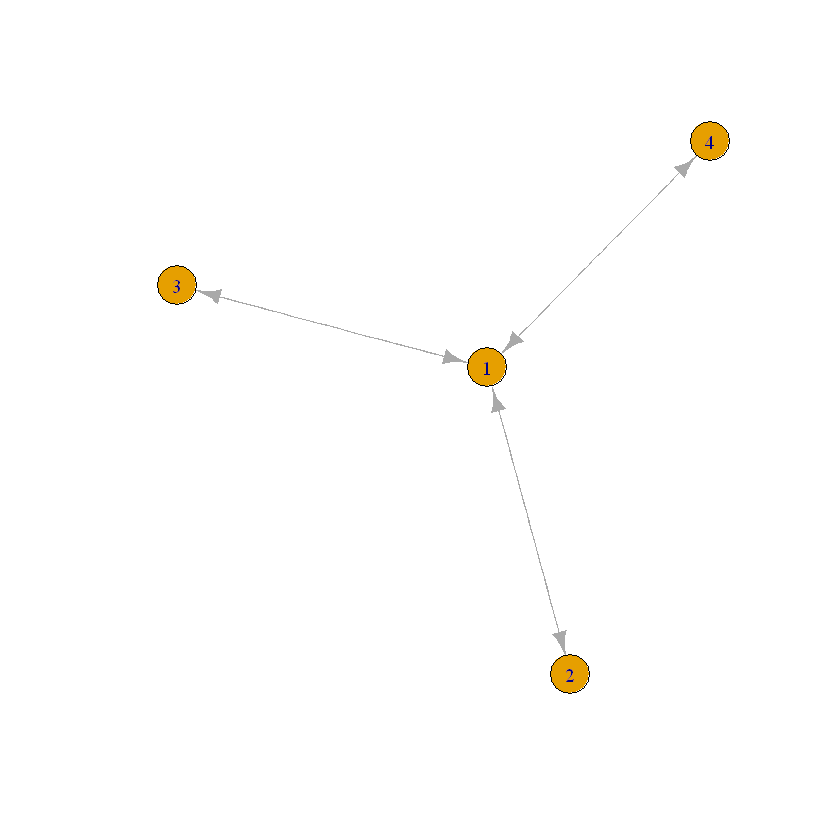

In [23]:
# getting more compact - combining the two if statements with if
n <- 4

A <- matrix(0, nrow=n, ncol=n)

for(i in 1:n){
    for(j in 1:n){
        if(i != j & (i == 1 | j == 1)){
                A[i, j] <- 1
        }
    }
}
A
plot(graph_from_adjacency_matrix(A))

0,1,1,1
1,0,1,1
1,1,0,1
1,1,1,0


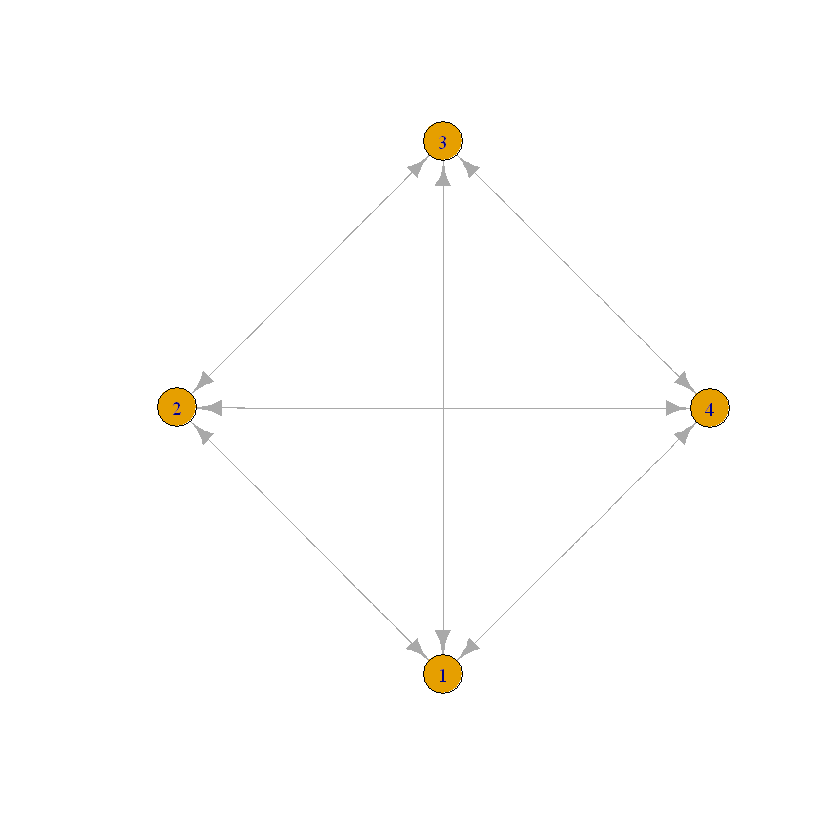

In [25]:
# creating a random network 
# for each connection in the matrix, there is a probability p to exists
n <- 4

p <- 1 
A <- matrix(0, nrow=n, ncol=n)

for(i in 1:n){
    for(j in 1:i){ #change the n into i
        if(i != j)
            if(runif(1) <= p){
                A[i, j] <- 1
        }
    }
}
A <- A + t(A) # transposing and adding the old matrix together with the transposed one
A
plot(graph_from_adjacency_matrix(A))
    
    # there is a problem with this: in economics, we don't want to have 
    
# triangular matrix: Matrix which has all 0 either below or above the triangular. 

2,1,1,1
1,0,1,1
1,1,0,1
1,1,1,0


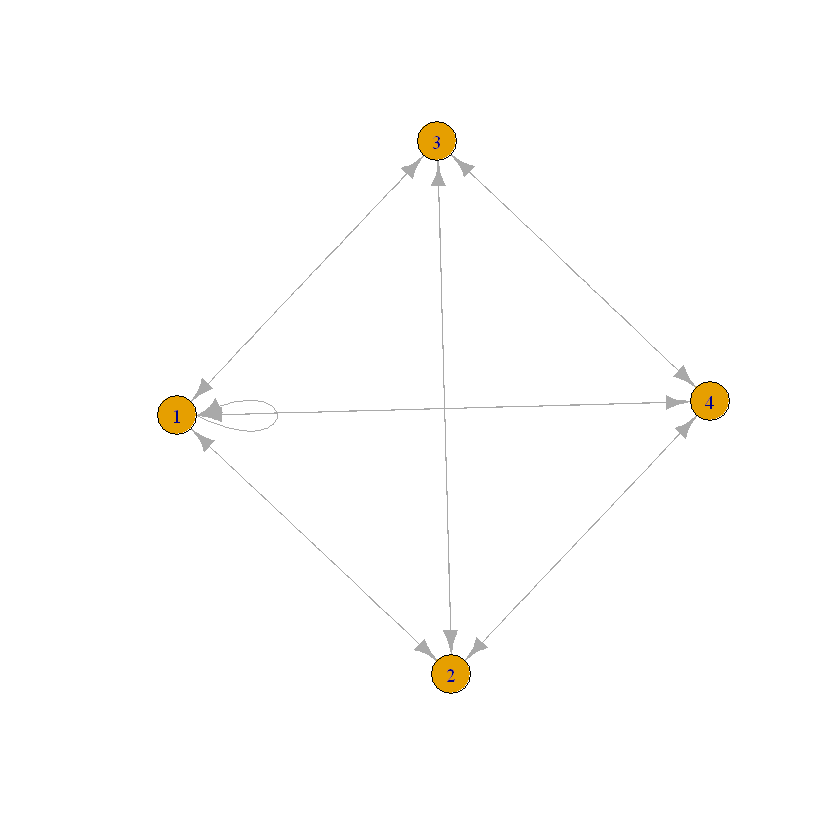

In [26]:
# now we want to vectorize the whole loop 

n <- 4

p <- 1 
A <- matrix(0, nrow=n, ncol=n)

for(i in 2:n){ #start at 2, don`t care about i=1 (don`t look at the first row) since we know it is 0
    for(j in 1:(i-1)){ #with this i will never equal j such that the next step gets redundant
            if(runif(1) <= p){
                A[i, j] <- 1
        }
    }
}
A <- A + t(A) # transposing and adding the old matrix together with the transposed one
A
plot(graph_from_adjacency_matrix(A))

In [42]:
# make it even shorter

n <- 4
p <- 1.0 
A <- matrix(0, nrow=n, ncol=n)

for(i in 2:n){ #start at 2, don`t care about i=1 (don`t look at the first row) since we know it is 0
       A[i, 1:(i-1)] <- as.integer(runif(i-1) <= p)
    }
A <- A + t(A) # transposing and adding the old matrix together with the transposed one
A
#plot(graph_from_adjacency_matrix(A))


0,1,1,1
1,0,1,1
1,1,0,1
1,1,1,0


In [43]:
p <- 0.5
as.integer(runif(i-1) <= p)

[1] 1 0 1

In [48]:
# now get rid of the for loop: use the sample function sample(x, size, replace 0=FALSE, prob=...) 

n <- 4
p <- 0.5 
A <- matrix(0, nrow=n, ncol=n)


temp <- sample(c(0,1), size=as.integer(n*(n-1)/2), 
        replace=T, prob=c(1-p,p))

A[lower.tri(A)]  <- temp       
    
# A <- A + t(A) # transposing and adding the old matrix together with the transposed one
A
#plot(graph_from_adjacency_matrix(A))


0,1,1,1
1,0,0,1
1,0,0,0
1,1,0,0
